In [2]:
from brian2 import *
from matplotlib.pyplot import *

In [3]:
%matplotlib inline

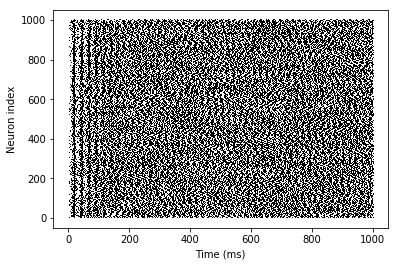

In [26]:
start_scope()

taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(1000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='exact')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

s_mon = SpikeMonitor(P)

run(1 * second)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

In [ ]:
# Integrate and fire
start_scope()

Vr=-65*mV
tau=5
R=1
eqs = '''
dv/dt=1/tau*(Vr-v+R*I)

'''
N = NeuronGroup(1,
                eqs,
                threshold='v>=Vt',
                reset='v=Vr',
                method='rk4')
M = SpikeMonitor(N)
plot(M.t/ms, M.)

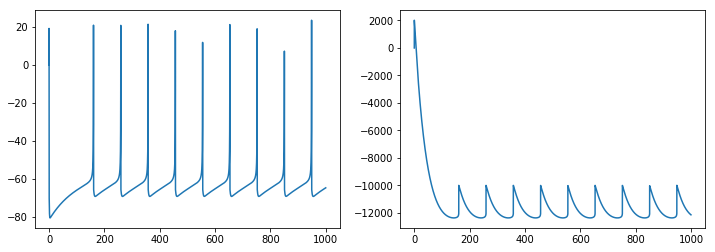

In [50]:
# Single izhikevich neuron

start_scope()

Vt=30*mV
a=0.02/ms
b=0.2/ms
c=-65*mV
d=2*mV/ms

duration=1000*ms

eqs = '''
dv/dt=(0.04/(mV*ms))*(v**2)+(5/ms)*v+140*mV/ms-u+I : volt
du/dt=a*(b*v-u) : volt/second
I : volt/second
'''

reset = '''
v=c
u=u+d
'''

G = NeuronGroup(1,
                eqs,
                threshold='v>=Vt',
                reset=reset,
                method='rk4')
G.I=4*mV/ms

statemon_v = StateMonitor(G, 'v', record=0)
statemon_u = StateMonitor(G, 'u', record=0)
spikemon = SpikeMonitor(G)
run(duration)

figure(figsize=(12,4))
subplot(121)
plot(statemon_v.t/ms, statemon_v.v[0]/mV)

subplot(122)
plot(statemon_u.t/ms, statemon_u.u[0]/mV)

In [4]:
# Single izhikevich neuron

start_scope()

Vt=30*mV
a=0.02/ms
b=0.2/ms
c=-65*mV
d=8*mV/ms

duration=1000*ms

excitatory_neuron_eqs = '''
dv/dt=(0.04/(mV*ms))*(v**2)+(5/ms)*v+140*mV/ms-u+I : volt
du/dt=a*(b*v-u) : volt/second
I : volt/second
'''

reset = '''
v=c
u=u+d
'''

G = NeuronGroup(100,
                excitatory_neuron_eqs,
                threshold='v>=Vt',
                reset=reset,
                method='rk4')
G.I=4*mV/ms

G.v='(100*rand()-65)*mV'
G.u='-10*rand()*mV/ms'
statemon_v = StateMonitor(G, 'v', record=range(5))
statemon_u = StateMonitor(G, 'u', record=range(5))
spikemon = SpikeMonitor(G)
run(duration)

plot(spikemon.t/ms, spikemon.i, '.k')
for i in range(5):
    figure(figsize=(12,4))
    subplot(121)
    plot(statemon_v.t/ms, statemon_v.v[i]/mV,)

    subplot(122)
    plot(statemon_u.t/ms, statemon_u.u[i]/mV)



In [45]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    

In [61]:

excitatory_neuron_eqs = '''
dv/dt=(0.04/(mV*ms))*(v**2)+(5/ms)*v+140*mV/ms-u+I : volt
du/dt=a*(b*v-u) : volt/second
I : volt/second
'''
excitatory_reset_eq = '''
v=c
u=u+d
'''
excitatory_thres_eq = 'v>=Vt'

def watts_strogatz(N, k, p, eqs, thres_eq, reset_eq, method='rk4'):
    G = NeuronGroup(N, eqs, threshold=thres_eq, reset=reset_eq, method=method)
    S = Synapses(G, G)
    j_cond = 'x if sample()>=p else randint(0, N_pre+1) ' + \
             'for x in range(clip(i-k/2, 0, N_pre), clip(i+k/2+1, 0, N_pre))'
    S.connect(j=j_cond)
    return G, S

G, S = watts_strogatz(10, 6, 0.1, excitatory_neuron_eqs, excitatory_thres_eq, excitatory_reset_eq)
visualise_connectivity(S)
    
    




SyntaxError: Unknown syntax: IfExp (<string>)

In [12]:
S = Synapses(G, G)

In [13]:
S.connect(j='k for k in sample(N_post, p=i*1.0/(N_pre-1))')

In [ ]:
for k in range(i-k//2, i+k//2+1):
    if sample() <= p:
        

In [58]:
k = 4
i = 7
N = 10
p = 0.1
[k if sample() >= p else randint(0, N+1) for k in range(i-k//2, i+k//2+1)]
    


[5, 6, 7, 8, 5]

In [60]:
'a'+'b'

'ab'

In [30]:
import random
random.randint(0, 10)

4

In [31]:
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [33]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [34]:
random_integers(0, 10)

WARNING    /Users/jaime/Documents/Year4/NeuroProject/brian/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  """Entry point for launching an IPython kernel.
 [py.warnings]


9

In [41]:
randint(0, 10+1)

7